## ทำการวิเคราะห์ข้อมูล ##

In [167]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns

In [2]:
# open file
reddit_covid_en  = pd.read_excel('D:/my_data/clean/reddit_covid_th_cleaned.xlsx')
reddit_ebola_en  = pd.read_excel('D:/my_data/clean/reddit_covid_en_cleaned.xlsx')
twitter_covid_th = pd.read_excel('D:/my_data/clean/twitter_covid_th_cleaned.xlsx')
twitter_covid_en = pd.read_excel('D:/my_data/clean/twitter_covid_en_cleaned.xlsx')
twitter_ebola_en = pd.read_excel('D:/my_data/clean/twitter_ebola_en_cleaned.xlsx')

### ลองแสดงข้อมูล ###

In [3]:
reddit_covid_en.head()

,title,score,id,url,comms_num,timestamp
0,Please consider downloading BOINC or foldingho...,2391,fd29vj,https://www.reddit.com/r/COVID19/comments/fd29...,1047,2020-03-04 12:56:00
1,CDC recommends cancelling or postponing all pu...,2184,fjbv0q,https://www.cdc.gov/coronavirus/2019-ncov/comm...,444,2020-03-16 15:35:00
2,We were able to ascertain that patients who ha...,1998,fkizd0,https://www.mediterranee-infection.com/wp-cont...,442,2020-03-18 18:33:00
3,Data from SARS outbreak showed that mask weari...,1795,ffy8av,https://www.cochranelibrary.com/cdsr/doi/10.10...,476,2020-03-10 08:26:00
4,Relationship between the ABO Blood Group and t...,1734,fjzjpc,https://www.medrxiv.org/content/10.1101/2020.0...,407,2020-03-17 20:05:00


In [4]:
reddit_ebola_en.head()

,title,score,id,url,comms_num,timestamp
0,I met yearold Moses Massaquoi today Hes a hyge...,1956,2jg459,http://i.imgur.com/kLhaux5.jpg,129,2014-10-17 10:43:00
1,Ebola survivor Christopher washes blue paint ...,1738,2jii6m,http://i.imgur.com/eEhQPJu.jpg,91,2014-10-18 04:12:00
2,Yesterday I showed you the ebola kit on our IC...,1293,2jeilp,http://imgur.com/a/ZQWR4,493,2014-10-17 00:05:00
3,outside an Ebola hospital guy pulls a mattress...,995,2j7j4s,http://i.imgur.com/19857Nm.jpg,251,2014-10-15 02:59:00
4,NYC Doctor tests positive for ebola,747,2k5fkp,http://www.nytimes.com/2014/10/24/nyregion/cra...,822,2014-10-24 15:30:00


In [5]:
twitter_covid_th.head()

,Id,username,location,time_stamp,text,followers_count,retweet_count,favorite_count
0,362503379,Purebloodsz,Thailand,2020-03-19 07:57:29,ว่าแต่เทรนเนอร์ที่ไหนเนี้ย แล้วก่อนหน้านี้เค้า...,38309,0,0
1,856823519107316992,proxumer,Thailand,2020-03-19 07:57:25,COVID ไข้หวัด หรือภูมิแพ้ แต่เราสามารถ เช็กอ...,5781,0,0
2,723891243340587008,whathcn,Thailand,2020-03-19 07:57:05,ขาย พึ่งสมัครวันนี้ค่ะ แพ็กเกจ เดือนค่ะ ขาย...,0,0,0
3,1116699085166140032,sorkorlao,Thailand,2020-03-19 07:57:03,คนไทยค้องช่วยกัน อย่าหวังพึ่งพาลุงโควิท โควิด ...,39917,0,0
4,2479547882,BrightTodayTh,Thailand,2020-03-19 07:56:56,สาธารณสุข แถลงสถานการณ์ โรคโควิด วันที่ มีค พ...,41058,1,0


In [6]:
twitter_covid_en.head()

,Id,username,location,time_stamp,text,followers_count,retweet_count,favorite_count
0,2965655845,Fukkard,"Hyderabad, India",2020-03-19 07:36:11,A word of caution from Mega Star Chiranjeevi g...,92184,0,0
1,31264880,AFNtelevision,"March ARB, California",2020-03-19 07:36:11,because every red light eventually turns green...,4908,0,0
2,1182257542455539968,nukelda1,"London, England",2020-03-19 07:36:09,Day in quarantine coronavirus londonlockdown ...,7,0,0
3,4732405876,sindaniv,"Bungoma, Kenya",2020-03-19 07:36:09,When you experience high body temperatures fev...,1453,0,0
4,28541686,DrAlexShehata,GVA | Cairo | NYC | Montclair,2020-03-19 07:36:07,Here a few ideasobservations I had about COVID...,758,0,0


In [7]:
twitter_ebola_en.head()

,Id,username,location,time_stamp,text,followers_count,retweet_count,favorite_count
0,1024331753941619968,MDMEDICINE1,United Arab Emirates,2020-03-19 08:55:08,WHO pandemic expert DrMikeRyan what we learned...,47,1,1
1,853736260397084032,BeeNewsDaily,United States,2020-03-19 08:55:07,KungFlu KungFuTea and Ebola are not racist wo...,4161,1,1
2,1024331753941619968,MDMEDICINE1,United Arab Emirates,2020-03-19 08:45:31,WHO pandemic expert DrMikeRyan What we learned...,47,0,0
3,3402412635,ADFmagazine,Africa,2020-03-19 08:45:08,SierraLeone President Bio engages members of f...,374,0,0
4,18754412,MacJordaN,ACC/YFB/YEG/SFO/NBO/YYZ,2020-03-19 08:43:18,Update from Liberia The country is applying l...,16928,0,1


### ดูความสัมพันธ์ของแต่ละ column มนแต่ละตาราง ###

#### ทำการ plot Heatmap เพื่อดูความสัมพันธ์ของข้อมูลในตารางต่างๆ

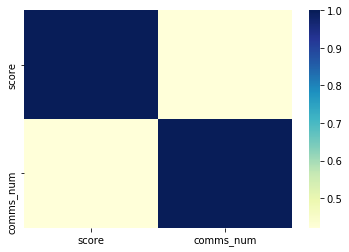

In [168]:
sns.heatmap(reddit_covid_en.corr(), cmap = 'YlGnBu')

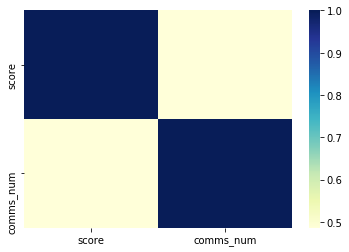

In [169]:
sns.heatmap(reddit_ebola_en.corr(), cmap = 'YlGnBu')

#### จะเห็นได้ว่าข้อมูลจาก Reddit ทั้งสองตาราง ในแต่ละ column ไมมีความสัมพันธ์กันเลย

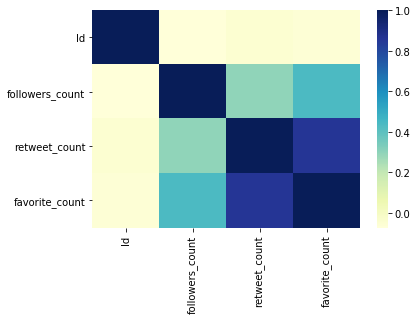

In [170]:
sns.heatmap(twitter_covid_en.corr(), cmap = 'YlGnBu')

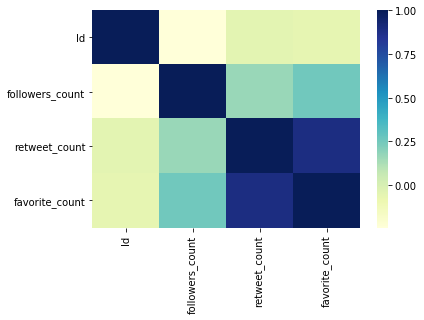

In [171]:
sns.heatmap(twitter_covid_th.corr(), cmap = 'YlGnBu')

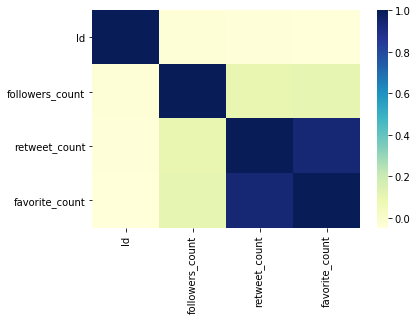

In [172]:
sns.heatmap(twitter_ebola_en.corr(), cmap = 'YlGnBu')

#### จะเห็นได้ว่าข้อมูลจาก Twitter ทั้งสามตาราง ในแต่ละ column มีความสัมพันะ์ค่อนข้างมาก เช่น column favorite_count กับ retweet_count 

### สร้างกราฟจากข้อมูล ###

In [8]:
import matplotlib.pyplot as plt

#### 5 location ที่มีการ Tweets ที่ติด #covid มากที่สุด จากข้อมูล Twitter ภาษาอังกฤษ ####

In [137]:
df = twitter_covid_en.groupby('location').username.agg(['count']).sort_values(by='count', ascending=False).head()

Text(0, 0.5, 'Tweet_count')

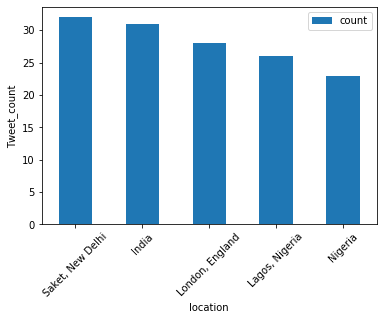

In [139]:
df.plot.bar(rot=45).set_ylabel('Tweet_count')

#### 5 location ที่มีการ Re Tweets ที่ติด #covid มากที่สุด จากข้อมูล Twitter ภาษาอังกฤษ ####

In [111]:
df1 = twitter_covid_en.groupby('location').retweet_count.agg(['sum','mean'])

* เรียงตามผลรวม

Text(0, 0.5, 'retweet_count')

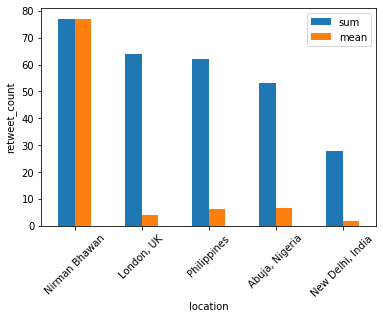

In [164]:
df1.sort_values(by='sum', ascending=False).head(5).plot.bar(rot=45).set_ylabel('retweet_count')

* เรียงตามค่าเฉลี่ย

Text(0, 0.5, 'retweet_count')

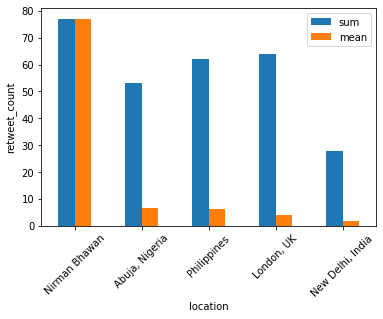

In [165]:
df1.sort_values(by='mean', ascending=False).head(5).plot.bar(rot=45).set_ylabel('retweet_count')

#### 5 location แรก ที่มีการ Tweets ที่ติด #ebola มากที่สุด จากข้อมูล Twitter ภาษาอังกฤษ ####

In [143]:
df2 = twitter_ebola_en.groupby('location').username.agg(['count']).sort_values(by = 'count', ascending=False).head(5)

Text(0, 0.5, 'Tweet_count')

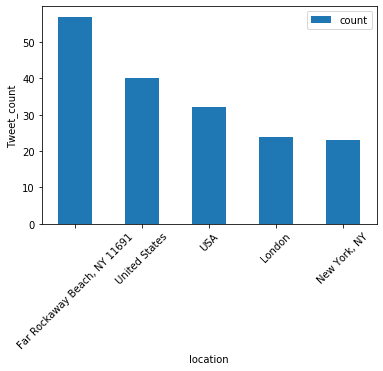

In [147]:
df2.plot.bar(rot=45).set_ylabel('Tweet_count')

#### 5 location แรก ที่มีการ Re Tweets ที่ติด #ebola มากที่สุด จากข้อมูล Twitter ภาษาอังกฤษ ####

In [162]:
df3 = twitter_ebola_en.groupby('location').retweet_count.agg(['sum', 'mean'])

* เรียงตามผลรวม

Text(0, 0.5, 'Retweet_count')

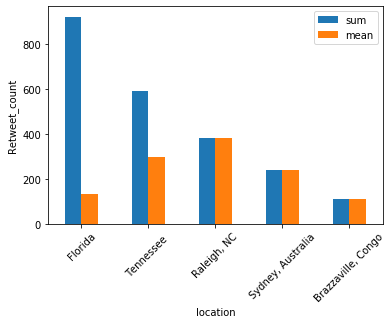

In [159]:
df3.sort_values(by='sum', ascending=False).head(5).plot.bar(rot=45).set_ylabel('Retweet_count')

* เรียงตามค่าเฉลี่ย

Text(0, 0.5, 'Retweet_count')

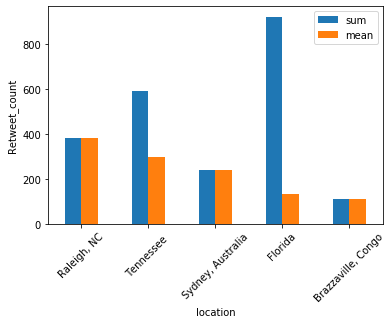

In [158]:
df3.sort_values(by='mean', ascending=False).head(5).plot.bar(rot=45).set_ylabel('Retweet_count')

### สรุปผลที่ได้จากกราฟเกี่ยวกับโรค Covid ###

#### ภาพแสดงจำนวนผู้ที่ติเชื่อและเสียชีวิตจาก Covid-19  ในแต่ละประเทศ ####
ข้อมูลจากเว็บไซต์ : https://kku.world/7-w4d
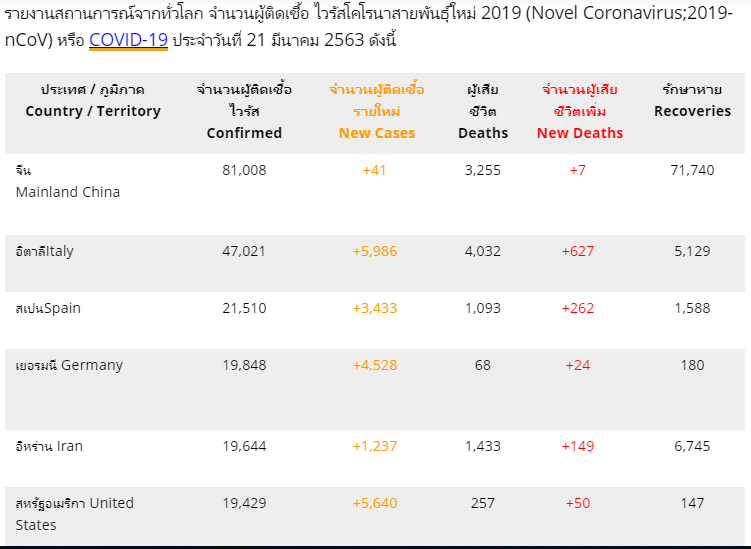

* จากภาพแสดงจำนวนผู้ที่ติเชื่อและเสียชีวิตจาก Covid-19  ในแต่ละเประเทศ จะเห็นได้ว่าประเทศที่มีผู้ติดเชื้อและผู้เสียชีวิตมากที่สุด ไม่มีประเทศใดเลยที่มีรายชื่อในกราฟ 5 location แรกที่มีการ Tweet หรือ Retweet #covid 

### สรุปผลที่ได้จากกราฟเกี่ยวกับโรค Ebola ###

#### ภาพแสดงจำนวนผู้ที่ติดเชื้ออีโบล่าและจำนวนผู้เสียชีวิต ในประเทศคองโก จากองค์การอนามัยโลก (world health organization) ####
* จากเว็บไซต์ : https://www.who.int/emergencies/diseases/ebola/drc-2019
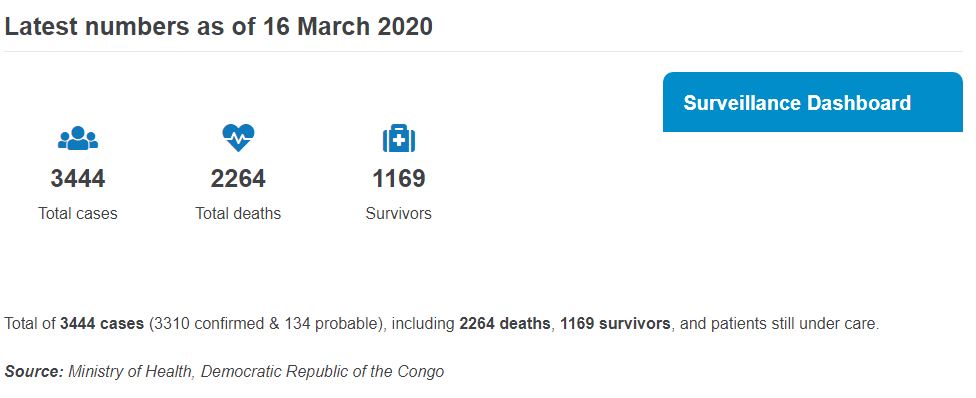

* เมื่อทำการนำกราฟที่แสดงผล 5 location แรกที่มีการ Tweet หรือ Retweet #ebola มาเปรียบเทียบกับข้อมูลจำนวนผู้เสียชีวิตจากโรคอีโบล่าในคองโก จะเห็นได้ว่าผู้คนในคองโกมีการพูดถึง โรค Ebola ผ่าน Twitter ซึ่งก็เป็นไปตามสถานการณ์การระบาดของโรคอีโบล่าในประเทศ ซึ่งแสดงให้เห็นถึงความสนใจของผู้คนในคองโก เกี่ยวกับปัญหาโรคอีโบล่า ที่เกิดขึ้นประเทศของตน

### จากข้อมูลที่แสดงด้านบนทั้งหมด เราอาจจะสรุปได้ว่า  ###
#### 1. ประเทศที่มีการ Tweet หรือ Retweet เกี่ยวกับโรค Covid มากที่สุด คือประเทศที่มีจำนวนผู้ที่ติดเชื้อหรือเสียชีวิตน้อยกว่าประเทศที่ไม่ได้ทำการ Tweet หรือ Retweet ####

#### 2. อาจจะสรุปได้อีกอย่างว่าผู้คนในประเทศคองโก มีความสนใจและใส่ใจเกี่ยวกับปัญหาโรคอีโบล่าในประเทศของตนเป็นอย่างมาก ####

#### 3. การที่ผู้คนออกมา Tweet หรือ Retweet นั่น อาจจะแสดงให้เห็นถึงความใส่ใจเกียวกับข่าวสารหรือปัญหาที่กำลังเกิดขึ้นในสังคมโลกหรือประเทศของตนเอง ####

### กราฟแท่งแสดงจำนวนคำว่า ebola, covid ใน Reddit, Twitter ###
* โดยหารด้วยจำนวน row 

In [153]:
# set ให้เป็น lower เพื่อง่ายในการค้นหา

# Reddit
reddit_covid_en.title = reddit_covid_en.title .str.lower() 
reddit_ebola_en.title = reddit_ebola_en.title .str.lower() 

# Twitter
twitter_covid_th.text =  twitter_covid_th.text .str.lower() 
twitter_covid_en.text =  twitter_covid_en.text .str.lower() 
twitter_ebola_en.text =  twitter_ebola_en.text .str.lower() 


### count covid, ebola ###

In [10]:
# count covid
count_reddit_covid     = reddit_covid_en.title.str.count('covid').sum()
count_twitter_covid_en = twitter_covid_en.text.str.count('covid').sum()
count_twitter_covid_th = twitter_covid_th.text.str.count('covid').sum()


# count ebola
count_reddit_ebola  = reddit_ebola_en.title.str.count('ebola').sum()
count_twitter_ebola = twitter_ebola_en.text.str.count('ebola').sum()

In [11]:
# จำนวน column, row
m,n = reddit_ebola_en.shape
j,k   = twitter_ebola_en.shape


<BarContainer object of 2 artists>

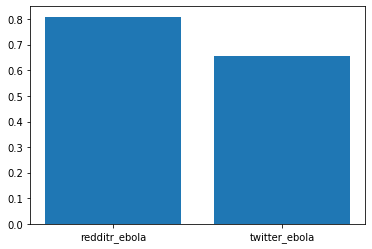

In [161]:
plt.bar(['redditr_ebola', 'twitter_ebola'],  [count_reddit_ebola/m , count_twitter_ebola/j])

* จะเห็นได้ว่าใน Reddit มีการพูดถึง Ebola มากกว่า 

In [13]:
a,b = reddit_covid_en.shape
c,d = twitter_covid_en.shape
e,f = twitter_covid_th.shape

<BarContainer object of 3 artists>

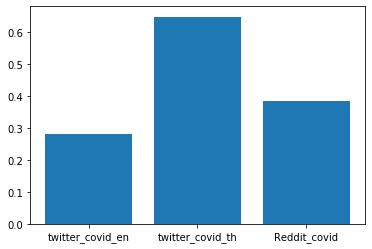

In [14]:
plt.bar( ['twitter_covid_en', 'twitter_covid_th', 'Reddit_covid'],  [count_twitter_covid_th/e , count_twitter_covid_en/c, count_reddit_covid/a  ])

* จะเห็นได้ว่า ใน Twitter มีการพูดถึง Covid มากที่สุด

## Thai text preprocessing using Python ##
- เราจะทำการวิเคราะห์ข้อความที่ถูกทวีตจาก Twitter และ Reddit ว่าคำใดถูกใช้มากที่สุด 
 


 1. ทำการดึงข้อความ text จากตาราง

In [15]:
# เก็บข้อความไว้ใน list
# Reddit
list_reddit_covid_en  = [i for i in reddit_covid_en.title]
list_reddit_ebola_en  = [i for i in reddit_ebola_en.title]

#Twitter
list_twitter_covid_th = [i for i in twitter_covid_th.text]
list_twitter_covid_en = [i for i in twitter_covid_en.text]
list_twitter_ebola_en = [i for i in twitter_ebola_en.text]

In [16]:
# นำค่าใน list แต่ละค่ามาต่อกันเป็น sring

#Reddit
text_reddit_covid_en  = ''.join(item for item in list_reddit_covid_en)
text_reddit_ebola_en  = ''.join(item for item in list_reddit_ebola_en)


#Twitter
text_twitter_covid_th = ''.join(item for item in list_twitter_covid_th)
text_twitter_covid_en = ''.join(item for item in list_twitter_covid_en)
text_twitter_ebola_en = ''.join(item for item in list_twitter_ebola_en)

In [17]:
# ลองแสดงข้อมูล
text_twitter_covid_en

'a word of caution from mega star chiranjeevi garu stay safe covid covidindia because every red light eventually turns greenencouraging words from mcconaughey covid coronavirus  day  in quarantine coronavirus londonlockdown covid quarantinewhen you experience high body temperatures fever headache runny nose coughing and sneezing then difficult in br… here a few ideasobservations i had about covid inhospital feel free to add your ideas n medtwitter… a pandemic disease has spreadis nepal out of this worldcovidstaysafequarantinelifewhat parents of deaf children need to know before their childs school closes  please share and help get this in… covidthis is the time to our homeopaths friends and researchers to come forwardhomeopathy is also efficient in… returned from annual leave early to support my team with our policy response to covid expect new guidance for… segalink they dont care about us they are all about the  but they forgot the covid doesnt recognize eli… can eucommission skyriak

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


### ทำการนับคำซ้ำ และแสดงผลแบบภาพ ###

* import libary ที่ต้องใช้

In [74]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [19]:
import nltk

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
from nltk.corpus import stopwords
set(stopwords.words('english'))
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [22]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus

In [23]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# ทำการตัดคำ

# Reddit
token_reddit_covid_en = word_tokenize(text_reddit_covid_en)
token_reddit_ebola_en = word_tokenize(text_reddit_ebola_en)


# Twitter
token_twitter_covid_th = word_tokenize(text_twitter_covid_th)
token_twitter_covid_en = word_tokenize(text_twitter_covid_en)
token_twitter_ebola_en = word_tokenize(text_twitter_ebola_en)

In [24]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist

#m ทำการนับคำซ้ำ
# Reddit
fdist_reddit_covid_en = FreqDist(token_reddit_covid_en)
fdist_reddit_ebola_en = FreqDist(token_reddit_ebola_en)


#Twitter
fdist_twitter_covid_th = FreqDist(token_twitter_covid_th)
fdist_twitter_covid_en = FreqDist(token_twitter_covid_en)
fdist_twitter_ebola_en = FreqDist(token_twitter_ebola_en)


In [81]:
# To find the frequency of top  words

#Reddit
fdist_reddit_covid_en1 = fdist_reddit_covid_en.most_common(20)
fdist_reddit_ebola_en1 = fdist_reddit_ebola_en.most_common(20)

# Twitter
fdist_twitter_covid_th1 = fdist_twitter_covid_th.most_common(100)
fdist_twitter_covid_en1 = fdist_twitter_covid_en.most_common(20)
fdist_twitter_ebola_en1 = fdist_twitter_ebola_en.most_common(20)

### คำที่ถูกใช้งานมากที่สุดใน Reddit หัวข้อ Covid ###

In [26]:
fdist_reddit_covid_en1

[('of', 534),
 ('the', 377),
 ('and', 283),
 ('in', 263),
 ('covid', 230),
 ('for', 193),
 ('to', 189),
 ('a', 179),
 ('coronavirus', 168),
 ('on', 109),
 ('with', 92),
 ('from', 76),
 ('is', 75),
 ('sarscov', 67),
 ('novel', 65),
 ('patients', 57),
 ('disease', 53),
 ('are', 51),
 ('that', 50),
 ('cases', 47)]

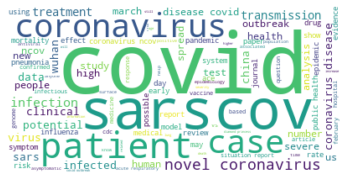

In [38]:
# lower max_font_size, change the maximum number of word and lighten the background:
text = text_reddit_covid_en
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### คำที่ถูกใช้งานมากที่สุดใน Twitter หัวข้อ Covid ###

In [27]:
fdist_twitter_covid_en1

[('the', 933),
 ('covid', 774),
 ('to', 770),
 ('of', 519),
 ('in', 434),
 ('a', 419),
 ('and', 404),
 ('is', 368),
 ('for', 334),
 ('coronavirus', 299),
 ('are', 259),
 ('you', 234),
 ('this', 210),
 ('on', 186),
 ('we', 178),
 ('’', 167),
 ('i', 162),
 ('from', 161),
 ('that', 156),
 ('be', 155)]

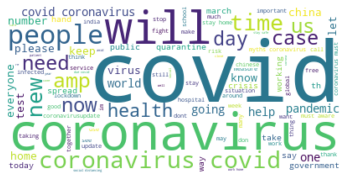

In [80]:
# lower max_font_size, change the maximum number of word and lighten the background:
text = text_twitter_covid_en
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### คำที่ถูกใช้งานมากที่สุดใน Twitter (ภาษาไทย) หัวข้อ Covid ###


In [28]:
fdist_twitter_covid_th1

[('โควิด', 906),
 ('covid', 329),
 ('ราย', 121),
 ('โควิท', 115),
 ('โควิด…', 83),
 ('คน', 61),
 ('…', 59),
 ('covid…', 52),
 ('บาท', 41),
 ('ml', 41),
 ('มีค', 39),
 ('coronavirus', 39),
 ('สวดมนต์ไล่โควิด', 38),
 ('โควิดเราต้องรอด', 37),
 ('สธ', 35),
 ('ล่าสุด', 33),
 ('วัน', 32),
 ('แอลกอฮอล์', 30),
 ('ไวรัสโคโรนา', 28),
 ('มีนาคม', 26)]

In [82]:
# เก็บเป็น Data dict
word_dict = dict((x,y) for (x,y) in fdist_twitter_covid_th1)

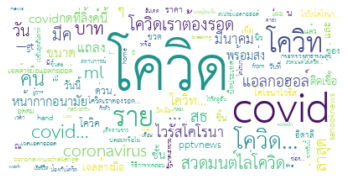

In [83]:
wordcloud = WordCloud(font_path='D:/2-2562/Data Engineering/Project/font/THSarabunNew.ttf',
                      background_color ='white',max_words=100).fit_words(word_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

จากกราฟทั้ง 3 กราฟด้านบน แสดงให้เห็นว่า #covid ในไทยกับต่างประเทศมีการพูดถึงที่มีความแตกต่างกันเล็กน้อยเช่น ในต่างประเทศจะมีคำว่า covid, coronavirus, patients, people แต่ในไทยจะเห็นได้ว่ามี สวดมนต์ไล่โควิด, แอลกอฮอล์, หน้ากากอนามัย, โควิดเราต้องรอด นั่นอาจจะแสดงให้เห็นถึงวิกฤติการขาดแคลนหน้ากากอนามัย แอลกอฮอล์ล้างมือในไทย และการรับมือเกี่ยวกับโรคโควิดของรัฐบาลไทยที่มีนโยบายให้ประชาชน "สวดมนต์ไล่โควิด" 

### คำที่ถูกใช้งานมากที่สุดใน Reddit  หัวข้อ ebola ###


In [29]:
fdist_reddit_ebola_en1

[('ebola', 572),
 ('in', 387),
 ('the', 370),
 ('to', 367),
 ('of', 325),
 ('for', 153),
 ('and', 147),
 ('a', 142),
 ('is', 130),
 ('from', 90),
 ('cases', 88),
 ('with', 86),
 ('on', 85),
 ('new', 80),
 ('who', 79),
 ('sierra', 79),
 ('at', 77),
 ('leone', 77),
 ('liberia', 70),
 ('patient', 68)]

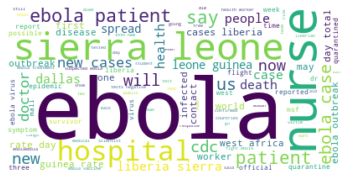

In [79]:
# lower max_font_size, change the maximum number of word and lighten the background:
text = text_reddit_ebola_en
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 ### คำที่ถูกใช้งานมากที่สุดใน Twitter หัวข้อ ebola ###

In [30]:
fdist_twitter_ebola_en1

[('the', 1012),
 ('ebola', 882),
 ('to', 571),
 ('in', 459),
 ('of', 425),
 ('a', 405),
 ('and', 404),
 ('is', 397),
 ('for', 250),
 ('it', 223),
 ('covid', 213),
 ('’', 212),
 ('coronavirus', 208),
 ('we', 207),
 ('that', 203),
 ('this', 203),
 ('i', 197),
 ('from', 179),
 ('you', 161),
 ('are', 150)]

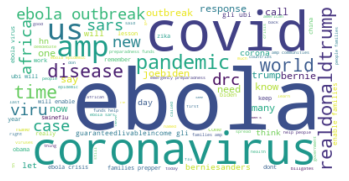

In [84]:
# lower max_font_size, change the maximum number of word and lighten the background:
text = text_twitter_ebola_en
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

เนื่องจาก ข้อมูลโรคอีโบล่าที่ดึงจาก Reddit นั้นเป็นข้อมูลตั้งแต่ปี 2014 แต่ข้อมูลโรคอีโบล่าที่ดึงจาก Twitter เป็นข้อมูลในปี 2020 จะเห็นได้ว่าคำที่ถูกใช้มากที่สุดนั้นแตกต่างกัน เช่น ใน #ebola ในปี2020 จะมีการพูดถึงโรค covid, coronavirus แต่ในปี 2014 จะพูดถึงแต่โรค ebola 